## First steps: MSG data (Native format)

- Use satpy module for working with MSG data (https://satpy.readthedocs.io/en/stable/index.html)
- Download data from Eumetsat Data Store (https://eoportal.eumetsat.int/userMgmt/protected/welcome.faces)

**Import modules**

In [1]:
from satpy.scene import Scene
from satpy.resample import get_area_def
from satpy.dataset import combine_metadata
from satpy import find_files_and_readers
from satpy.writers import available_writers
from satpy import DataQuery
from datetime import datetime
from pyresample import load_area
import glob
import warnings
import numpy as np
import xarray
import netCDF4

**Read data**
- The SEVIRI Rapid Scan file is delivered in native format (.nat)
- The *seviri_l1b_native* reader for loading the files

In [2]:
# path to file(s)
fname = glob.glob('./data/MSG3-SEVI-MSG15-0100-NA-20210704143415.653000000Z-NA/MSG3-SEVI-MSG15-0100-NA-20210704143415.653000000Z-NA.nat')

# read the file: SEVIRI Rapid Scan (native format)
scn = Scene(reader='seviri_l1b_native', filenames=fname)

**Generating a composite**

In [3]:
# available composites
scn.available_composite_ids()

[DataID(name='airmass'),
 DataID(name='ash'),
 DataID(name='cloudtop'),
 DataID(name='cloudtop_daytime'),
 DataID(name='colorized_ir_clouds'),
 DataID(name='convection'),
 DataID(name='day_microphysics'),
 DataID(name='day_microphysics_winter'),
 DataID(name='dust'),
 DataID(name='fog'),
 DataID(name='green_snow'),
 DataID(name='hrv_clouds'),
 DataID(name='hrv_fog'),
 DataID(name='hrv_severe_storms'),
 DataID(name='hrv_severe_storms_masked'),
 DataID(name='ir108_3d'),
 DataID(name='ir_cloud_day'),
 DataID(name='ir_overview'),
 DataID(name='ir_sandwich'),
 DataID(name='natural_color'),
 DataID(name='natural_color_nocorr'),
 DataID(name='natural_color_raw'),
 DataID(name='natural_color_with_night_ir'),
 DataID(name='natural_color_with_night_ir_hires'),
 DataID(name='natural_enh'),
 DataID(name='natural_enh_with_night_ir'),
 DataID(name='natural_enh_with_night_ir_hires'),
 DataID(name='natural_with_night_fog'),
 DataID(name='night_fog'),
 DataID(name='night_ir_alpha'),
 DataID(name='night

/Users/nicobader/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:1256: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  return self._crs.to_proj4(version=version)
/Users/nicobader/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:1256: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  return self._crs.to_proj4(version=version)
/Users/nicobader/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:1256: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
 

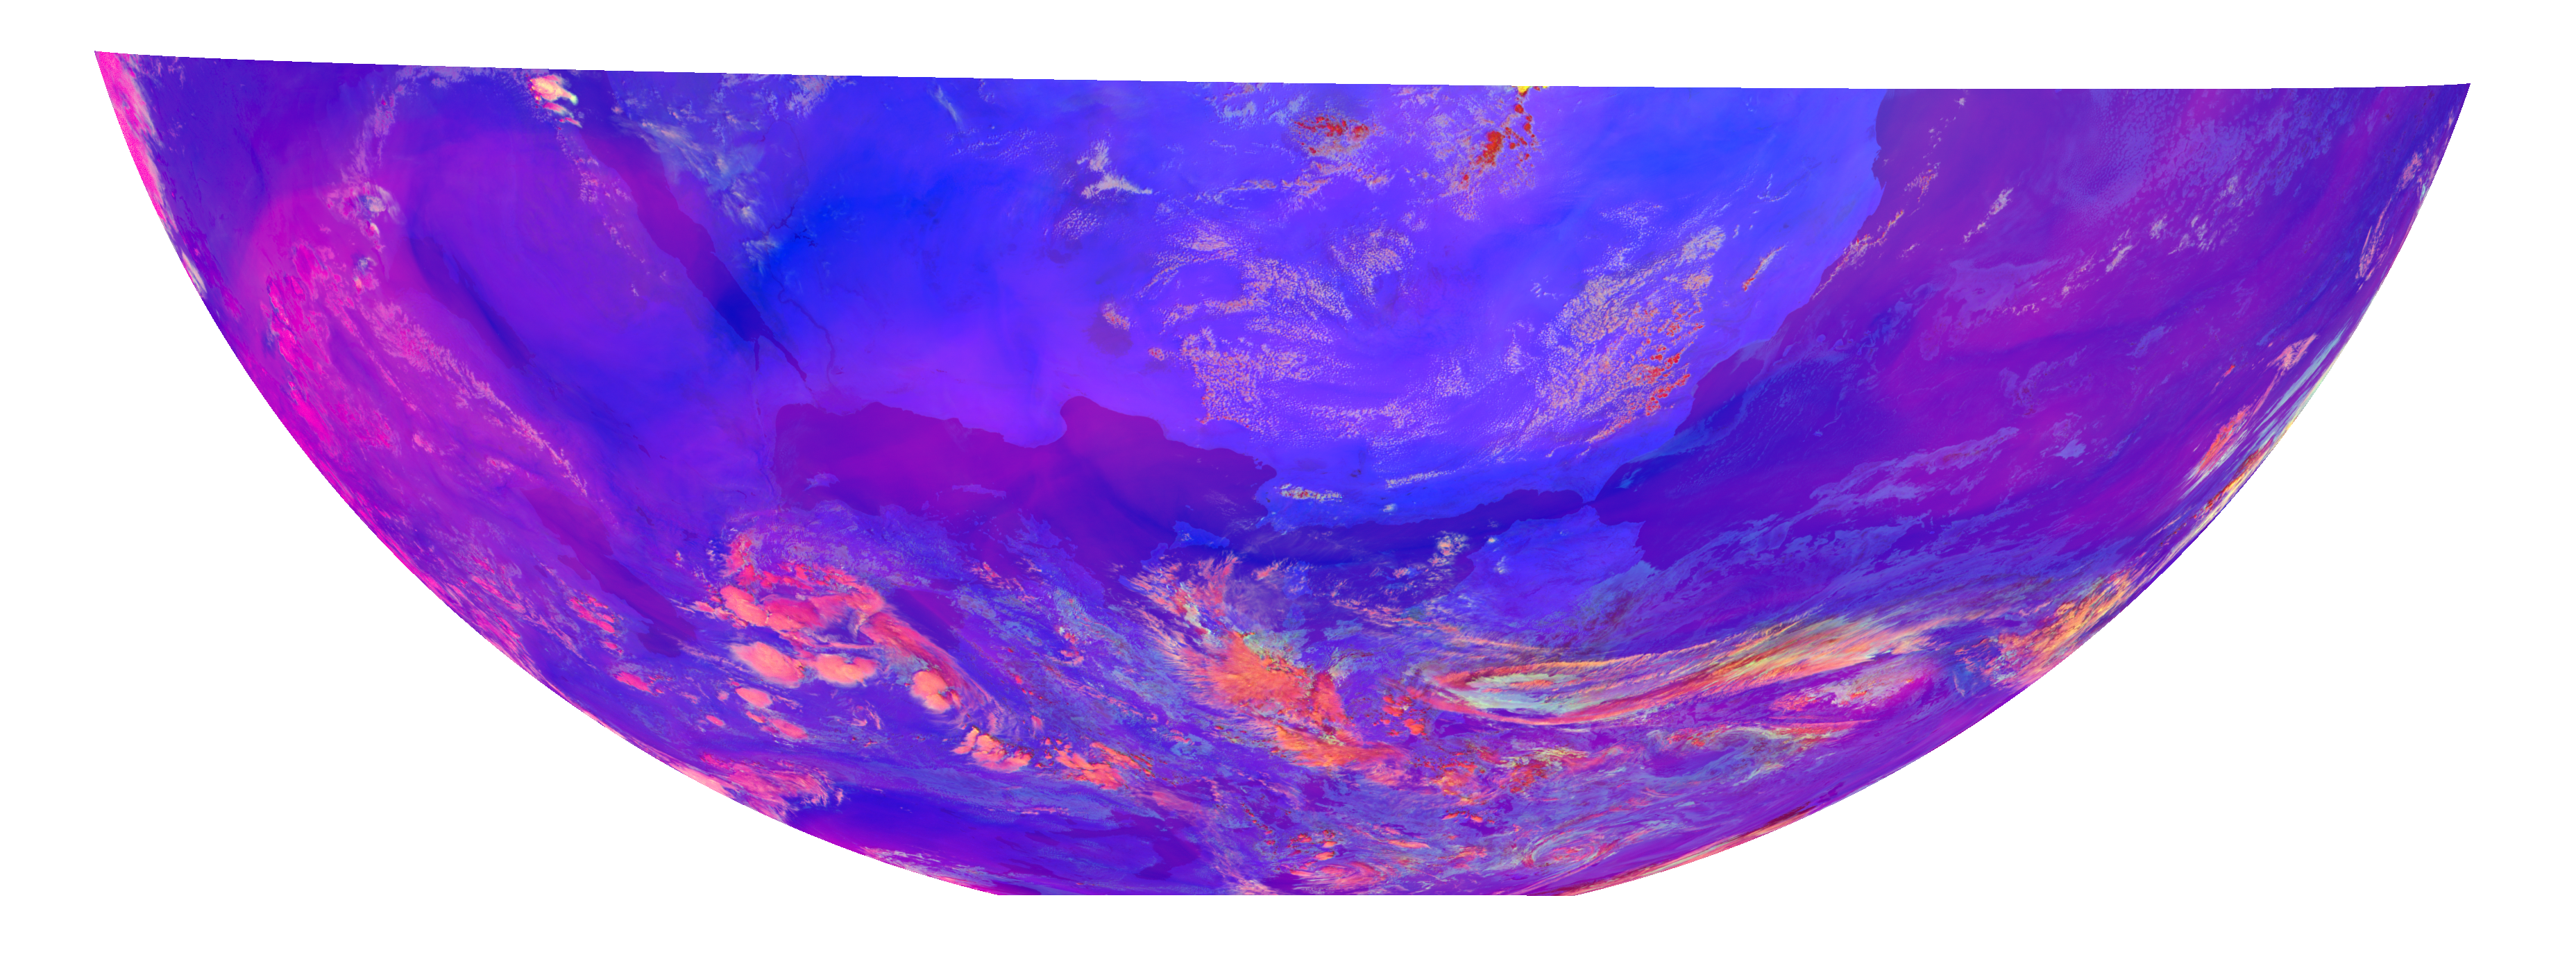

In [4]:
# load the data as composite
composite = 'convection'
scn.load([composite])

# show the composite
scn.show(composite)

**Load Datasets**

In [24]:
# available datasets
scn.all_dataset_ids()

Easy request: Requesting datasets by *name* or *wavelength*

In [4]:
# load the data from datasets
scn.load(['IR_108'])

# show the loaded composite
scn.show('IR_108')

Detailed request: Requesting datasets by other metadata

In [23]:
my_query = DataQuery(name = 'IR_108', calibration = 'radiance')
scn.load([my_query])

**Combine Datasets**

Example: Calculate NDVI and combine it with the datasets

In [5]:
# load needed datasets
scn.load(['VIS006','VIS008'])

# calculate NDVI
ndvi = (scn['VIS008'] - scn['VIS006']) / (scn['VIS008'] + scn['VIS006'])

# Define NDVI dataset
ndvi.attrs = combine_metadata(scn['VIS008'], scn['VIS006'])
scn['ndvi'] = ndvi

# Plot the NDVI
scn.show('ndvi')

/Users/nicobader/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:1256: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  return self._crs.to_proj4(version=version)


**Resampling Datasets**

/Users/nicobader/opt/anaconda3/lib/python3.7/site-packages/pyresample/spherical.py:337: RuntimeWarning: invalid value encountered in cos
  self.cvertices = np.array([np.cos(self.lat) * np.cos(self.lon),
/Users/nicobader/opt/anaconda3/lib/python3.7/site-packages/pyresample/spherical.py:338: RuntimeWarning: invalid value encountered in cos
  np.cos(self.lat) * np.sin(self.lon),
/Users/nicobader/opt/anaconda3/lib/python3.7/site-packages/pyresample/spherical.py:338: RuntimeWarning: invalid value encountered in sin
  np.cos(self.lat) * np.sin(self.lon),
/Users/nicobader/opt/anaconda3/lib/python3.7/site-packages/pyresample/spherical.py:339: RuntimeWarning: invalid value encountered in sin
  np.sin(self.lat)]).T * radius
/Users/nicobader/opt/anaconda3/lib/python3.7/site-packages/pyresample/spherical.py:245: RuntimeWarning: invalid value encountered in double_scalars
  if self.end.lon - self.start.lon > np.pi:
/Users/nicobader/opt/anaconda3/lib/python3.7/site-packages/pyresample/spherical.py:2

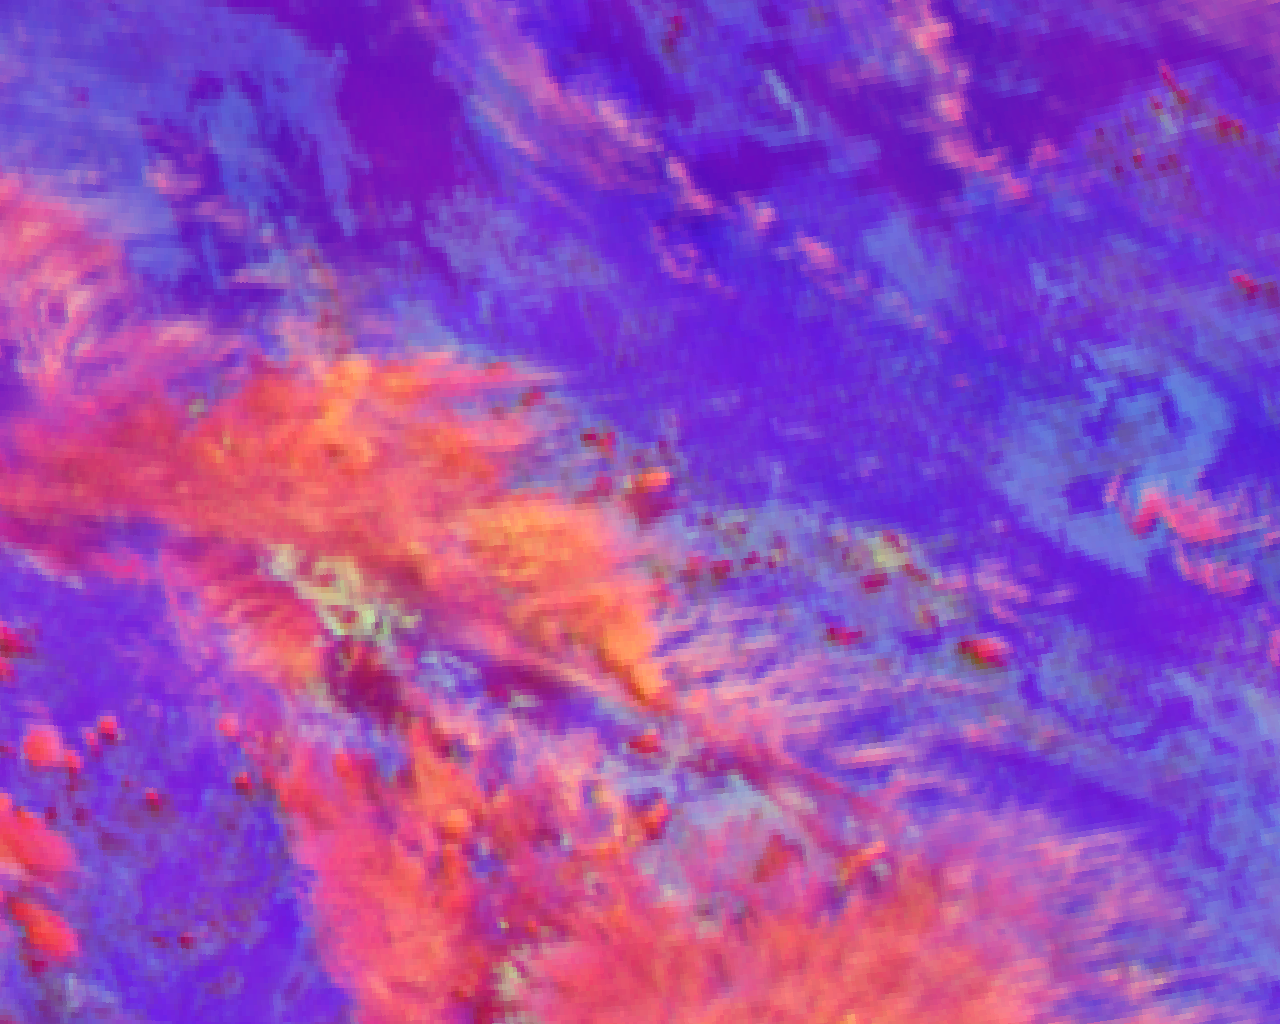

In [5]:
# load an example dataset
#scn.load(['natural_color'])

# resample data to Germany
local_scn = scn.resample("germ2")
local_scn.show('convection')

**Save files**

In [43]:
# netCDF file
scn.save_datasets(filename = 'testfile.nc', base_dir = './data/', writer = 'cf', engine = 'netcdf4')